In [1]:
import cv2
import numpy as np
import sys
import os
import math
import matplotlib.pyplot as plt

In [2]:
raw_img = cv2.imread('lena.bmp', cv2.IMREAD_GRAYSCALE)
np.set_printoptions(threshold=sys.maxsize)

In [3]:
def ZeroCrossing(img,t):
    res = np.zeros(img.shape)
    padded = cv2.copyMakeBorder(img,1,1,1,1,cv2.BORDER_REFLECT)
    kernel = np.array([[1,1,1],[1,0,1],[1,1,1]])
    for row in range(img.shape[0]):
        for col in range(img.shape[1]):
            res[row,col] = 255
            if img[row,col] >= t :
                for krow in range(kernel.shape[0]):
                    for kcol in range(kernel.shape[1]):
                        if kernel[krow,kcol] == 0:
                            continue
                        cor_row = row + krow 
                        cor_col = col + kcol 
                        if padded[cor_row,cor_col] <= -t:
                            res[row,col] = 0
                            break
            # elif img[row,col] <= -t:
            #     for krow in range(kernel.shape[0]):
            #         for kcol in range(kernel.shape[1]):
            #             if kernel[krow,kcol] == 0:
            #                 continue
            #             cor_row = row + krow 
            #             cor_col = col + kcol
            #             if padded[cor_row,cor_col] >= t:
            #                 res[row,col] = 0
            #                 break
    return res

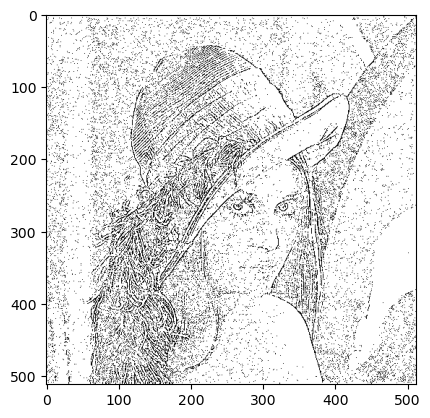

In [4]:
def LaplacianMask_1(img,threshold):
    res = np.zeros(img.shape)
    padded = cv2.copyMakeBorder(img,1,1,1,1,cv2.BORDER_REFLECT)
    ker = np.array([[0,1,0],[1,-4,1],[0,1,0]])
    for row in range(img.shape[0]):
        for col in range(img.shape[1]):
            magnitude = 0
            for krow in range(ker.shape[0]):
                for kcol in range(ker.shape[1]):
                    cor_row = row + krow 
                    cor_col = col + kcol 
                    magnitude += ker[krow,kcol] * padded[cor_row, cor_col]
            if magnitude >= threshold:
                res[row,col] = 1
            elif magnitude <= -threshold:
                res[row,col] = -1
            else:
                res[row,col] = 0
    return res
img_a = ZeroCrossing(LaplacianMask_1(raw_img,15),1)
plt.imshow(img_a,cmap='gray')
plt.imsave('LaplacianMask_1.jpg',img_a,cmap='gray')

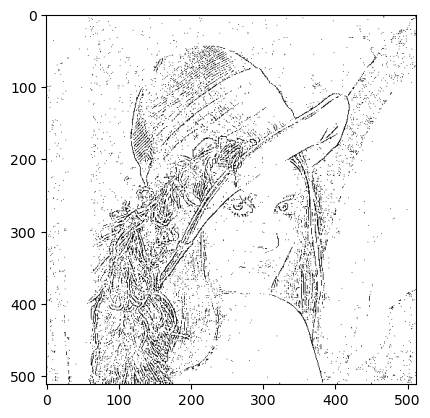

In [5]:
def LaplacianMask_2(img,threshold):
    res = np.zeros(img.shape)
    padded = cv2.copyMakeBorder(img,1,1,1,1,cv2.BORDER_REFLECT)
    ker = np.array([[1,1,1],[1,-8,1],[1,1,1]])
    for row in range(img.shape[0]):
        for col in range(img.shape[1]):
            magnitude = 0
            for krow in range(ker.shape[0]):
                for kcol in range(ker.shape[1]):
                    cor_row = row + krow 
                    cor_col = col + kcol 
                    magnitude += (1/3) * ker[krow,kcol] * padded[cor_row, cor_col]
            if magnitude >= threshold:
                res[row,col] = 1
            elif magnitude <= -threshold:
                res[row,col] = -1
            else:
                res[row,col] = 0
    return res

img_b = ZeroCrossing(LaplacianMask_2(raw_img,15),1)
plt.imshow(img_b,cmap='gray')
plt.imsave('LaplacianMask_2.jpg',img_b,cmap='gray')

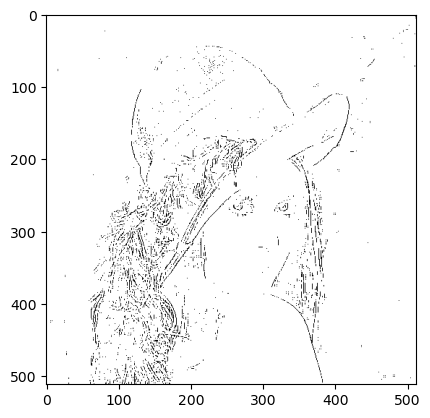

In [6]:
def MinVarLaplacian(img,threshold):
    res = np.zeros(img.shape)
    padded = cv2.copyMakeBorder(img,1,1,1,1,cv2.BORDER_REFLECT)
    ker = np.array([[2,-1,2],[-1,-4,-1],[2,-1,2]])
    for row in range(img.shape[0]):
        for col in range(img.shape[1]):
            magnitude = 0
            for krow in range(ker.shape[0]):
                for kcol in range(ker.shape[1]):
                    cor_row = row + krow 
                    cor_col = col + kcol 
                    magnitude += (1/3) * ker[krow,kcol] * padded[cor_row, cor_col]
            if magnitude >= threshold:
                res[row,col] = 1
            elif magnitude <= -threshold:
                res[row,col] = -1
            else:
                res[row,col] = 0
    return res

img_c = ZeroCrossing(MinVarLaplacian(raw_img,20),1)
plt.imshow(img_c,cmap='gray')
plt.imsave('MinVarLaplacian.jpg',img_c,cmap='gray')

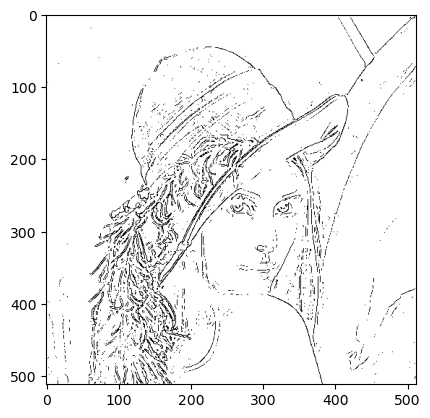

In [7]:
def LaplacianGaussian(img,threshold):
    res = np.zeros(img.shape)
    padded = cv2.copyMakeBorder(img,5,5,5,5,cv2.BORDER_REFLECT)
    ker = np.array([[0,0,0,-1,-1,-2,-1,-1,0,0,0],
                   [0,0,-2,-4,-8,-9,-8,-4,-2,0,0],
                   [0,-2,-7,-15,-22,-23,-22,-15,-7,-2,0],
                   [-1,-4,-15,-24,-14,-1,-14,-24,-15,-4,-1],
                   [-1,-8,-22,-14,52,103,52,-14,-22,-8,-1],
                   [-2,-9,-23,-1,103,178,103,-1,-23,-9,-2],
                   [-1,-8,-22,-14,52,103,52,-14,-22,-8,-1],
                   [-1,-4,-15,-24,-14,-1,-14,-24,-15,-4,-1],
                   [0,-2,-7,-15,-22,-23,-22,-15,-7,-2,0],
                   [0,0,-2,-4,-8,-9,-8,-4,-2,0,0],
                   [0,0,0,-1,-1,-2,-1,-1,0,0,0]]
                   )
    for row in range(img.shape[0]):
        for col in range(img.shape[1]):
            magnitude = 0
            for krow in range(ker.shape[0]):
                for kcol in range(ker.shape[1]):
                    cor_row = row + krow 
                    cor_col = col + kcol 
                    magnitude += ker[krow,kcol] * padded[cor_row, cor_col]
            if magnitude >= threshold:
                res[row,col] = 1
            elif magnitude <= -threshold:
                res[row,col] = -1
            else:
                res[row,col] = 0
    return res

img_d = ZeroCrossing(LaplacianGaussian(raw_img,3000),1)
plt.imshow(img_d,cmap='gray')
plt.imsave('LaplacianGaussian.jpg',img_d,cmap='gray')

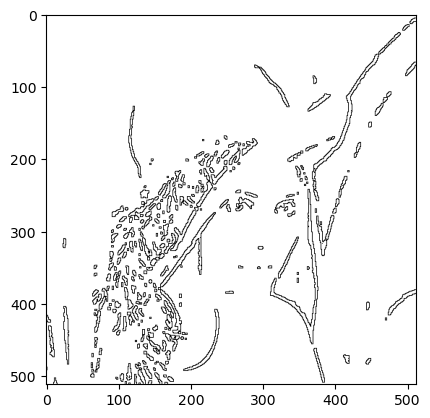

In [8]:
def DifferenceGaussian(img,threshold):
    res = np.zeros(img.shape)
    padded = cv2.copyMakeBorder(img,5,5,5,5,cv2.BORDER_REFLECT)
    ker = np.array([[-1,-3,-4,-6,-7,-8,-7,-6,-4,-3,-1],
                    [-3,-5,-8,-11,-13,-13,-13,-11,-8,-5,-3],
                    [-4,-8,-12,-16,-17,-17,-17,-16,-12,-8,-4],
                    [-6,-11,-16,-16,0,15,0,-16,-16,-11,-6],
                    [-7,-13,-17,0,85,160,85,0,-17,-13,-7],
                    [-8,-13,-17,15,160,283,160,15,-17,-13,-8],
                    [-7,-13,-17,0,85,160,85,0,-17,-13,-7],
                    [-6,-11,-16,-16,0,15,0,-16,-16,-11,-6],
                    [-4,-8,-12,-16,-17,-17,-17,-16,-12,-8,-4],
                    [-3,-5,-8,-11,-13,-13,-13,-11,-8,-5,-3],
                    [-1,-3,-4,-6,-7,-8,-7,-6,-4,-3,-1]])
    for row in range(img.shape[0]):
        for col in range(img.shape[1]):
            magnitude = 0
            for krow in range(ker.shape[0]):
                for kcol in range(ker.shape[1]):
                    cor_row = row + krow 
                    cor_col = col + kcol 
                    magnitude += ker[krow,kcol] * padded[cor_row, cor_col]
            if magnitude >= threshold:
                res[row,col] = 1
            elif magnitude <= -threshold:
                res[row,col] = -1
            else:
                res[row,col] = 0
    return res

img_e = ZeroCrossing(DifferenceGaussian(raw_img,1),1)
plt.imshow(img_e,cmap='gray')
plt.imsave('DifferenceGaussian.jpg',img_e,cmap='gray')